In [41]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#setup matplot's deafults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [43]:
import os
import warnings
warnings.filterwarnings('ignore')

In [44]:
data = pd.read_csv('heart.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


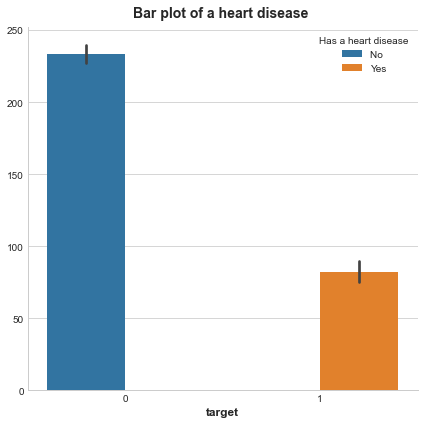

In [6]:
plt.figure(figsize = (6,6))
labels = ['No ', 'Yes']
a = sns.barplot(y = data.index,x = data['target'],hue = data['target'])
a.set(title = 'Bar plot of a heart disease ')
h, l = a.get_legend_handles_labels()
a.legend(h,labels,title = 'Has a heart disease')
sns.despine()
plt.show()

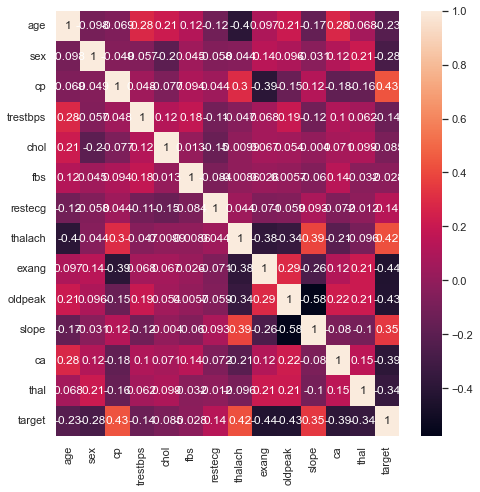

In [7]:
plt.figure(figsize = (7,7))
sns.set(font_scale = 1)
sns.heatmap(data.corr(),annot = True)
plt.show()

In [20]:
data.corr()['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

Interesting fact is that age and cholesterol are negativly correlated with a target

In [66]:
data['cp'].groupby(data['target']).value_counts() 
# People with no heart disease has a lack of chest pains
# People with a hear disease has a tendency of having chest pains

target  cp
0       0     104
        2      18
        1       9
        3       7
1       2      69
        1      41
        0      39
        3      16
Name: cp, dtype: int64

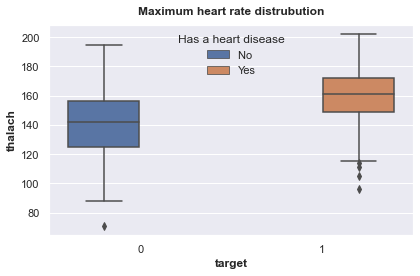

In [30]:
a = sns.boxplot(y = data['thalach'], x = data['target'],hue = data['target'])
h, l = a.get_legend_handles_labels()
a.set(title = 'Maximum heart rate distrubution')
a.legend(h,labels,title = 'Has a heart disease',loc = 'upper center')
plt.show()
#People with a higher maximum heart beat are more likely to have a heart disease

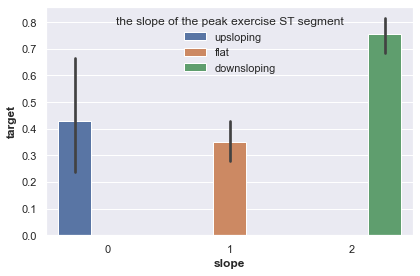

In [33]:
a = sns.barplot(y = data['target'], x = data['slope'],hue = data['slope'])
label = ['upsloping','flat','downsloping']
h,l = a.get_legend_handles_labels()
a.legend(h,label,title = 'the slope of the peak exercise ST segment',loc = 'upper center')
plt.show()
#flat ST segments represents good heart working
#upsloping is 

In [67]:
# check missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
#Data folding
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

In [58]:
#Model score validation
#Since its classification problem, model score is based on accuracy
from sklearn.model_selection import cross_val_score
def cross(model,X,y):
    score = cross_val_score(model,X,y,cv = kf,scoring = 'accuracy',n_jobs = -1)
    return score.mean()

In [76]:
#Models implementation
#Logistic regression
from sklearn.linear_model import LogisticRegression
# Naive-Bayes
from sklearn.naive_bayes import GaussianNB
#K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
#Decision tree
from sklearn.tree import DecisionTreeClassifier
#SupportVectorMachine
from sklearn.svm import SVC


In [79]:
lr = LogisticRegression(max_iter = 10000)
nv = GaussianNB()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svc = SVC()

In [52]:
train_raw = data.copy()
y = train_raw['target']
train = train_raw.drop('target',axis = 1)

In [80]:
#function to evaluate metrics from models
model_lst = [lr,nv,kn,dt,svc]
model_names = ['lr','nv','kn','dt','svc']
def model_eval(model_lst,model_names,x,y):
    d = {}
    for i in range(len(model_lst)):
        d[model_names[i]] = 'Accuracy: {:.2}'.format(cross(model_lst[i],x,y))
    return d
model_eval(model_lst,model_names,train,y)

{'lr': 'Accuracy: 0.75',
 'nv': 'Accuracy: 0.77',
 'kn': 'Accuracy: 0.5',
 'dt': 'Accuracy: 0.69',
 'svc': 'Accuracy: 0.31'}

In [84]:
raw_models_ev = {'lr': 'Accuracy: 0.75',
 'nv': 'Accuracy: 0.77',
 'kn': 'Accuracy: 0.5',
 'dt': 'Accuracy: 0.69',
 'svc': 'Accuracy: 0.31'}


In [68]:
# data transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [87]:
#normalize data
norm = MinMaxScaler()
norm_data = norm.fit_transform(train)
#standardize data
stand = StandardScaler()
stand_data = stand.fit_transform(train)
#robust removing
rob = RobustScaler()
rob_data = rob.fit_transform(train)

In [82]:
model_eval(model_lst,model_names,norm_data,y)

{'lr': 'Accuracy: 0.72',
 'nv': 'Accuracy: 0.77',
 'kn': 'Accuracy: 0.71',
 'dt': 'Accuracy: 0.68',
 'svc': 'Accuracy: 0.71'}

In [83]:
norm_models_ev = {'lr': 'Accuracy: 0.72',
 'nv': 'Accuracy: 0.77',
 'kn': 'Accuracy: 0.71',
 'dt': 'Accuracy: 0.68',
 'svc': 'Accuracy: 0.71'}

In [85]:
model_eval(model_lst,model_names,stand_data,y)

{'lr': 'Accuracy: 0.74',
 'nv': 'Accuracy: 0.77',
 'kn': 'Accuracy: 0.74',
 'dt': 'Accuracy: 0.68',
 'svc': 'Accuracy: 0.7'}

In [86]:
stand_model_ev = {'lr': 'Accuracy: 0.74',
 'nv': 'Accuracy: 0.77',
 'kn': 'Accuracy: 0.74',
 'dt': 'Accuracy: 0.69',
 'svr': 'Accuracy: 0.7'}

In [88]:
model_eval(model_lst,model_names,rob_data,y)

{'lr': 'Accuracy: 0.74',
 'nv': 'Accuracy: 0.77',
 'kn': 'Accuracy: 0.75',
 'dt': 'Accuracy: 0.68',
 'svc': 'Accuracy: 0.72'}

In [89]:
rob_model_ev = {'lr': 'Accuracy: 0.74',
 'nv': 'Accuracy: 0.77',
 'kn': 'Accuracy: 0.75',
 'dt': 'Accuracy: 0.68',
 'svc': 'Accuracy: 0.72'}